In [ ]:
import numpy as np
from scipy import optimize		# 最小二乘法拟合
import matplotlib.pyplot as plt 	# python matplotlib 绘图
from mpl_toolkits.mplot3d import Axes3D  # 3D 绘图

def func(x, y, p):
    """ 数据拟合所用的函数：z=ax+by
    :param x: 自变量 x
    :param y: 自变量 y
    :param p: 拟合参数 a, b
    """
    w1, w2, b = p
    return w1 * x + w2 * y + b

def residuals(p, z, x, y):
    #MSE
    distance = z - func(x, y, p)
    
    return distance

def main():
    x = np.array([137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00, 106.69, 138.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
    y = np.array([3, 2, 2, 3, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 2])
    z = np.array([145.00, 110.00, 93.00, 116.00, 65.32, 104.00, 118.00, 91.00, 62.00, 133.00, 51.00, 45.00, 78.50, 69.65, 75.69, 95.300])    

    plsq = optimize.leastsq(residuals, np.array([0, 0, 0]), args=(z, x, y))  # 最小二乘法拟合
    # [0, 0, 0] 为参数 w1, w2, b 初始值

    w1, w2, b = plsq[0]  # 获得拟合结果
    print("拟合结果:\nw1 = {}".format(w1))
    print("w2 = {}".format(w2))
    print("b = {}".format(b))

    # 绘图
    xp = np.linspace(-1, 6, 100)
    yp = np.linspace(-1, 6, 100)
    X, Y = np.meshgrid(xp, yp)
    Z = func(X, Y, [w1, w2, b])   # 带入拟合得到的 a, b

    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig)    # 3D 绘图
    ax.plot_surface(X, Y, Z, alpha=0.5)
    ax.scatter(x, y, z, color="r")

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("z")

    plt.show()

if __name__ == "__main__":
    main()

In [61]:
#1.采集数据
import numpy as np
import matplotlib.pyplot as plt # python matplotlib 绘图
from mpl_toolkits.mplot3d import Axes3D  # 3D 绘图
def input():
    x1 = np.array([137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00, \
                   106.69, 138.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
    x2 = np.array([3, 2, 2, 3, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 2])
    y = np.array([145.00, 110.00, 93.00, 116.00, 65.32, 104.00, 118.00, 91.00, \
                  62.00, 133.00, 51.00, 45.00, 78.50, 69.65, 75.69, 95.300])    
    
#     fig = plt.figure(figsize=(8, 6))
    fig = plt.figure(figsize=(100,10))
    ax = Axes3D(fig)    # 3D 绘图
    ax.scatter(x1, x2, y, color="r")
#     plt.show()
    
    #转化为Numpy数组
    data = np.stack((x1, x2, y), axis = 1)
#     print("data = ",data)
    return [data, ax]
    

In [43]:
#2.计算误差
def mse(w1, w2, b, data):
    totalError = 0
    for i in range(0,len(data)):
        x1 = data[i, 0]
        x2 = data[i, 1]
        y = data[i, 2]
        totalError += (( w1 * x1 + w2 * x2 + b) - y)**2
#     print("data.size:",data.size,"len(data)",len(data))
    return totalError/len(data)

In [44]:
#3.计算梯度
def step_gradient( w1_current, w2_current, b_current, data, lr):
    b_gradient = 0
    w1_gradient = 0
    w2_gradient = 0
    M = len(data)

    for i in range(0, len(data)):
        x1 = data[i, 0]
        x2 = data[i, 1]
        y = data[i, 2]
        #由MSE Loss导数公式得
        w1_gradient += (2/M) * x1 * ((w1_current * x1 + w2_current * x2 + b_current)-y)
        w2_gradient += (2/M) * x2 * ((w1_current * x1 + w2_current * x2 + b_current)-y)
        b_gradient += (2/M) * 1 * ((w1_current * x1 + w2_current * x2 + b_current)-y)
        
        
        if i % 4 == 0:
            new_w1 = w1_current - (lr * w1_gradient)
            new_w2 = w2_current - (lr * w2_gradient)
            new_b = b_current - (lr * b_gradient)
    #df、dw方向相反可以使得收敛
    new_w1 = w1_current - (lr * w1_gradient)
    new_w2 = w2_current - (lr * w2_gradient)
    new_b = b_current - (lr * b_gradient)
    return [new_w1, new_w2, new_b]

In [45]:
#4.更新梯度
def gradient_descent(data, start_w1, start_w2, start_b, lr, num_iterations):
    w1 = start_w1
    w2 = start_w2
    b = start_b
    for step in range(num_iterations):
        w1, w2, b = step_gradient(w1, w2, b, data, lr)
        loss = mse(w1, w2, b, data)
        if step % 1000 ==0:
            print("iterations:",step,"loss:",loss,"w1:",w1,"w2:",w2,"b:",b)
            #python3.6开始f"x:{x}"
#             print(f'iterations:{step},loss:{loss},w:{w},b:{b}')
    return [w1, w2, b]

iterations: 0 loss: 744.9556565997085 w1: 0.6919257738390798 w2: 0.33145169396448065 b: 0.8327773834581468
iterations: 1000 loss: 559.1812001240642 w1: 0.7349478856781464 w2: 0.33235860179469073 b: 0.833200460643764
iterations: 2000 loss: 434.0649490849605 w1: 0.7702543816600349 w2: 0.33310597850568885 b: 0.8335489842164375
iterations: 3000 loss: 349.8010665497641 w1: 0.7992289719393744 w2: 0.3337224342301689 b: 0.8338363245401708
iterations: 4000 loss: 293.05062593669834 w1: 0.8230072135969105 w2: 0.3342314481907487 b: 0.8340734541524341
iterations: 5000 loss: 254.83006533121855 w1: 0.8425210141418203 w2: 0.33465228887180465 b: 0.8342693777877644
iterations: 6000 loss: 229.08909394134628 w1: 0.8585351538043462 w2: 0.33500076916868327 b: 0.8344314852814021
iterations: 7000 loss: 211.7529339656261 w1: 0.8716772579601849 w2: 0.33528986610928485 b: 0.8345658411835728
iterations: 8000 loss: 200.07728522044664 w1: 0.882462394332914 w2: 0.33553022943544086 b: 0.8346774224346649
iterations: 9

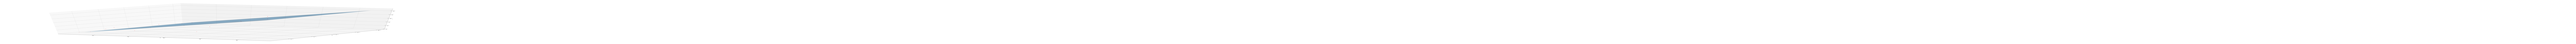

In [62]:
import random
if __name__ == "__main__":
    data, ax= input()
    lr = 1e-8
    #0初始化
#     init_w1, init_w2, init_b = [0,0,0]
    #随机初始化
    init_w1, init_w2, init_b = [random.random(),random.random(),random.random()]
    num_iterations = 20000
    [w1, w2, b] = gradient_descent(data, init_w1, init_w2, init_b, lr, num_iterations)
    loss = mse(w1, w2, b, data)
#     print(f"Final Loss:{loss}, w1:{w1},w2:{w2},b:{b}")
    print("Final Lose:",loss,"w1:",w1,"w2:",w2,"b:",b)

    # 绘图
    x1 = np.linspace(50, 150, 10)
    x2 = np.linspace(1, 10, 10)
    X1, X2 = np.meshgrid(x1, x2)
#     Z = func(X, Y, [w1, w2, b])   # 带入拟合得到的 a, b
    Z = w1 * X1 + w2 * X2 + b

#     ax = input()[1]
#     ax = Axes3D(fig)    # 3D 绘图
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Y")
    ax.plot_surface(X1, X2, Z, alpha=0.5)
    